[ランタイム] > [ランタイムのタイプの変更]でGPUになっているか確認

In [ ]:
import torch                   # PyTorchのインポート
import torch.nn as nn
import torch.nn.functional as F #活性化関数など
print(torch.__version__)       # バージョン確認
print(torch.cuda.is_available()) # GPUが正しく利用できるかの確認
import numpy as np # numpyのインポート

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device", device)

1.6.0+cu101
True
device cuda


cifar100用のVGG16


In [ ]:
# cifar100用にリサイズ
class MyVGG16Net(nn.Module):
  def __init__(self, num_classes):#num_class=100
    super(MyVGG16Net, self).__init__()
    # self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding = 1) # 224 * 224 or 32 * 32
    # self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding = 1)
    # self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding = 1) # 112 * 112 or 16 * 16
    # self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding = 1)
    # self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding = 1) # 56 * 56 or 8 * 8
    # self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding = 1)
    # self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding = 1)
    # self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding = 1) # 28 * 28 or 4 * 4
    # self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding = 1)
    # self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding = 1)
    # self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding = 1) # 14 * 14 or 2 * 2
    # self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding = 1)
    # self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding = 1)
    # self.pool = nn.MaxPool2d(2)
    # self.fc6 = nn.Linear(512, 512)
    # self.fc8 = nn.Linear(512, num_classes)
    # self.fc6 = nn.Linear(512 * 3 * 3, 4096)
    # self.fc7 = nn.Linear(4096, 4096)
    # self.fc8 = nn.Linear(4096, num_classes)
    # self.sm9 = nn.Softmax()
    self.conv1 = nn.Sequential (
          nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
          nn.Conv2d(64, 64, kernel_size=3, padding=1),nn.BatchNorm2d(64), nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2)
          )

    self.conv2 = nn.Sequential (
          nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
          nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2)
          )

    self.conv3 = nn.Sequential (
          nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
          nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
          nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2)
          )

    self.conv4 = nn.Sequential (
          nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2)
          )

    self.conv5 = nn.Sequential (
          nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.BatchNorm2d(512), nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2)
          )
    self.dence = nn.Sequential (
          nn.Linear(512, 512), nn.ReLU(), nn.Dropout(p = 0.5),
          nn.Linear(512, num_classes)#, nn.Softmax(dim=-1)
          )


  
  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.conv5(out)
    out = out.view(-1, 512)
    out = self.dence(out)

    return out



In [ ]:
from torchsummary import summary
mynet = MyVGG16Net(100).to(device)
# print(mynet)
# summary(mynet, (3, 224, 224))
summary(mynet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

初期化・設定

In [ ]:
import torch.optim as optim
# random seed 設定
import random
torch.manual_seed(1111)
np.random.seed(1111)
random.seed(1111)

mini_batch_size = 128


画像読み込み


In [ ]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),  # torch.Tensor へ変換
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 正規化する

#訓練データのダウンロードと変換
#扱うデータの集合であるデータセットを作成します。
#データは読み込まれる際に変換器によって変換され取り出されます。
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform) #transform=に前処理部分(今回は上のtransform)
#訓練データのローダ(読み込み器)の作成
#データセットからデータを読み込むローダを作成します。
#ローダを挟むことで同時に幾つのデータを読み込むか、順番に読み込むかランダムに読み込むかなどデータの読み込み方を容易に設定できます。
#またnum_workersの指定によってデータ読み込みの並列化を容易に実現できます。
trainloader = torch.utils.data.DataLoader(trainset, batch_size=mini_batch_size,
                                          shuffle=True, num_workers=2) #batch_sizeでバッチサイズも指定できる, shuffleでランダム順に
 
#テストデータのダウンロードと変換
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
#テストデータのローダ(読み込み器)の作成
testloader = torch.utils.data.DataLoader(testset, batch_size=mini_batch_size,
                                         shuffle=False, num_workers=2)

class_names = (
  'apples',  # 0：りんご
  'aquarium fish',  # 1：観賞魚
  'baby',  # 2：赤ちゃん
  'bear',  # 3：クマ
  'beaver',  # 4：ビーバー
  'bed',  # 5：ベッド
  'bee',  # 6：蜂
  'beetle',  # 7：カブトムシ
  'bicycle',  # 8：自転車
  'bottles',  # 9：ボトル
  'bowls',  # 10：ボウル
  'boy',  # 11：少年
  'bridge',  # 12：橋
  'bus',  # 13：バス
  'butterfly',  # 14：蝶
  'camel',  # 15：ラクダ
  'cans',  # 16：缶
  'castle',  # 17：城
  'caterpillar',  # 18：毛虫
  'cattle',  # 19：牛
  'chair',  # 20：椅子
  'chimpanzee',  # 21：チンパンジー
  'clock',  # 22：時計
  'cloud',  # 23：雲
  'cockroach',  # 24：ゴキブリ
  'couch',  # 25：ソファー
  'crab',  # 26：カニ
  'crocodile',  # 27：ワニ
  'cups',  # 28：カップ
  'dinosaur',  # 29：恐竜
  'dolphin',  # 30：イルカ
  'elephant',  # 31：象
  'flatfish',  # 32：ヒラメ
  'forest',  # 33：森
  'fox',  # 34：キツネ
  'girl',  # 35：少女
  'hamster',  # 36：ハムスター
  'house',  # 37：家
  'kangaroo',  # 38：カンガルー
  'computer keyboard',  # 39：コンピューターのキーボード
  'lamp',  # 40：ランプ
  'lawn-mower',  # 41：芝刈り機
  'leopard',  # 42：ヒョウ
  'lion',  # 43：ライオン
  'lizard',  # 44：トカゲ
  'lobster',  # 45：ロブスター
  'man',  # 46：成人男性
  'maple',  # 47：もみじ
  'motorcycle',  # 48：オートバイ
  'mountain',  # 49：山
  'mouse',  # 50：ねずみ
  'mushrooms',  # 51：きのこ
  'oak',  # 52：オーク
  'oranges',  # 53：オレンジ
  'orchids',  # 54：蘭
  'otter',  # 55：カワウソ
  'palm',  # 56：ヤシ
  'pears',  # 57：洋ナシ
  'pickup truck',  # 58：ピックアップトラック
  'pine',  # 59：松
  'plain',  # 60：平野
  'plates',  # 61：皿
  'poppies',  # 62：ポピー
  'porcupine',  # 63：ヤマアラシ
  'possum',  # 64：フクロネズミ
  'rabbit',  # 65：ウサギ
  'raccoon',  # 66：アライグマ
  'ray',  # 67：エイ
  'road',  # 68：道路
  'rocket',  # 69：ロケット
  'roses',  # 70：バラ
  'sea',  # 71：海
  'seal',  # 72：アザラシ
  'shark',  # 73：サメ
  'shrew',  # 74：トガリネズミ
  'skunk',  # 75：スカンク
  'skyscraper',  # 76：超高層ビル
  'snail',  # 77：カタツムリ
  'snake',  # 78：ヘビ
  'spider',  # 79：クモ
  'squirrel',  # 80：リス
  'streetcar',  # 81：路面電車
  'sunflowers',  # 82：ひまわり
  'sweet peppers',  # 83：パプリカ
  'table',  # 84：テーブル
  'tank',  # 85：タンク
  'telephone',  # 86：電話
  'television',  # 87：テレビ
  'tiger',  # 88：トラ
  'tractor',  # 89：トラクター
  'train',  # 90：電車
  'trout',  # 91：マス
  'tulips',  # 92：チューリップ
  'turtle',  # 93：カメ
  'wardrobe',  # 94：ワードローブ
  'whale',  # 95：クジラ
  'willow',  # 96：柳
  'wolf',  # 97：オオカミ
  'woman',  # 98：成人女性
  'worm',  # 99：ミミズ
)

Files already downloaded and verified
Files already downloaded and verified


試しに表示(24:ゴキが出ることもあるので注意)

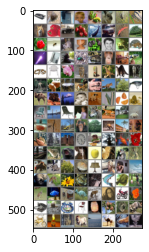

computer keyboard snail skyscraper woman


In [ ]:
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5  # [-1,1] を [0,1] へ戻す(正規化解除)
    npimg = img.numpy()  # torch.Tensor から numpy へ変換
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # チャンネルを最後に並び変える((C,X,Y) -> (X,Y,C))
    plt.show()  # 表示

dataiter = iter(trainloader)  # ローダを使って実際にデータを取得するためのイテレータを作成する
images, labels = dataiter.next()  # イテレータからデータを取得する

# 画像を表示する
imshow(torchvision.utils.make_grid(images))
# ラベル(クラス)を表示する
print(' '.join('%5s' % class_names[labels[j]] for j in range(4)))

学習ルーチン


In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt


loss_interval = 50 #test_lossを計算する間隔

#ネットワークを訓練する関数
def train(net, criterion, optimizer, scheduler, n_epoch = 15):
    net.train()  # ネットワークを訓練状態へ切り替える
    train_loss = []
    test_loss = []
    for epoch in range(n_epoch):  # 訓練データを複数回(n_epoch 周分)学習する
        for i, data in enumerate(trainloader, 0):
            # ローダからデータを読み込む; データは [inputs, labels] の形で取得される
            inputs, labels = data[0].to(device), data[1].to(device)

            # 勾配を0に初期化する(逆伝播に備える)
            optimizer.zero_grad()

            # 順伝播 + 逆伝播 + 最適化
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


            # 統計を計算する
            if i % loss_interval == (loss_interval - 1):    # loss_interval ミニバッチ毎に計算する
                train_loss.append(loss.item())
                # テストデータに対する損失を計算する(訓練はしない)
                with torch.no_grad():  #勾配計算をしない宣言(逆伝播用の計算グラフを作成しないことでメモリ節約、速度向上する)
                    data = iter(testloader).next()  #  テストデータを1ミニバッチ取得する
                    inputs, labels = data[0].to(device), data[1].to(device)
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    test_loss.append(loss.item())
                    print(loss.item())

        scheduler.step()
        print('epoch {}/{} finished'.format(epoch+1,n_epoch))
            
    print('Finished Training')
    return train_loss, test_loss

# 損失の変遷を表示する関数
def show_loss(train_loss, test_loss):
    plt.xlabel("iter")
    plt.ylabel("loss")
    x = [i*loss_interval for i in range(len(train_loss))]
    plt.plot(x, train_loss, label='train_loss')
    plt.plot(x, test_loss, label='test_loss')
    plt.legend()
    plt.show()

# ネットワークの予測精度を計算する関数
def check_accuracy(net, trainloader=trainloader, testloader=testloader):
    net.eval()  # ネットワークを評価状態へ切り替える
    ret = []
    with torch.no_grad():  #勾配計算をしない宣言(逆伝播用の計算グラフを作成しないことでメモリ節約、速度向上する)
        for loader, name in [[trainloader, 'train'], [testloader, 'test']]:
            correct = 0
            total = 0
            for data in loader:
                images, labels = data[0].to(device, dtype=torch.float), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            ret.append(100 * correct / total)
            print('Accuracy of the network on the {} images: {:.2f} %'.format(name, ret[-1]))

    return ret

LGL用のデータ分割

In [ ]:
import random

class Mydatasets(torch.utils.data.Dataset):
    def __init__(self, data, label, transform = None):
        self.transform = transform
        self.data = data
        self.label = label
        self.datanum = data.shape[0]

    def __len__(self):
        return self.datanum

    def __getitem__(self, idx):
        out_data = self.data[idx]
        out_label = self.label[idx]

        if self.transform:
            out_data = self.transform(out_data)

        return out_data, out_label



# trainsetの分割化
def data_sort(dataset, transform=transform):
  labels = [[] for i in range(100)]
  datas = [[] for i in range(100)]

  for i in range(len(dataset.targets)):
    id = dataset.targets[i]
    labels[id].append(id)
    datas[id].append(dataset.data[i])
  
  datasets = []
  for i in range(100):
    d = np.array(datas[i])
    datasets.append(Mydatasets(d, labels[i], transform))
  return datasets

def random_shuffle(datasets):
  d_tmp = datasets
  random.shuffle(d_tmp)
  return d_tmp

#datasetにdatasets[offset:offset+num-1]の範囲のデータセットを加える
def append_datasets(dataset, datasets, num, offset):
  datas = dataset.data if len(dataset) > 0 else np.empty([0,32,32,3])
  labels = dataset.label if len(dataset) > 0 else []
  for i in range(num if num <= len(datasets) - offset else len(datasets) - offset ):
      datas = np.append(datas, datasets[offset+i].data, axis=0)
      labels.extend(datasets[offset+i].label)
  return Mydatasets(datas, labels, dataset.transform)

LGLトレーニング

In [ ]:
import math

loss_interval = 50 #test_lossを計算する間隔

#ネットワークを訓練する関数
def LGL_train(net, criterion, n_epoch = 15, m = 4, initial_lr = 0.01, lr_decay = 0.95):
    # 初期化
    train_datas = np.empty([0,32,32,3])
    train_labels = []
    traindataset = Mydatasets(train_datas, train_labels, transform) 
    test_datas = np.empty([0,32,32,3])
    test_labels = []
    testdataset = Mydatasets(test_datas, test_labels, transform)
    id = 0
    
    traindatasets = data_sort(trainset)
    testdatasets_tmp = data_sort(testset)
    testdatasets = [[] for i in range(100)]
    random.shuffle(traindatasets)
    for i in range(100):
        k = traindatasets[i].label[0]
        print(k)
        testdatasets[i] = testdatasets_tmp[k]
    

    for t in range(m):      
        #  optimizerとLRスケジューラの初期化
        optimizer = optim.SGD(net.parameters(), lr=initial_lr, momentum=0.9, weight_decay = 5e-4)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=lr_decay, last_epoch=-1)

        #datasetの設定
        num = math.ceil(100 / m)
        traindataset = append_datasets(traindataset, traindatasets, num, id)
        testdataset = append_datasets(testdataset, testdatasets, num, id)
        id += num

        #トレインデータ・テストデータのローダ(読み込み器)の作成
        trainloader = torch.utils.data.DataLoader(traindataset, batch_size=mini_batch_size,
                                            shuffle=True, num_workers=2) #batch_sizeでバッチサイズも指定できる, shuffleでランダム順に 
        testloader = torch.utils.data.DataLoader(testdataset, batch_size=mini_batch_size,
                                            shuffle=True, num_workers=2)


        train_loss = []
        test_loss = []
        acc = []
        for epoch in range(n_epoch):  # 訓練データを複数回(n_epoch 周分)学習する
            net.train()  # ネットワークを訓練状態へ切り替える
            for i, data in enumerate(trainloader, 0):
                # ローダからデータを読み込む; データは [inputs, labels] の形で取得される
                inputs, labels = data[0].to(device, dtype=torch.float), data[1].to(device)

                # 勾配を0に初期化する(逆伝播に備える)
                optimizer.zero_grad()

                # 順伝播 + 逆伝播 + 最適化
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()


                # 統計を計算する
                if i % loss_interval == (loss_interval - 1):    # loss_interval ミニバッチ毎に計算する
                    train_loss.append(loss.item())
                    # テストデータに対する損失を計算する(訓練はしない)
                    with torch.no_grad():  #勾配計算をしない宣言(逆伝播用の計算グラフを作成しないことでメモリ節約、速度向上する)
                        data = iter(testloader).next()  #  テストデータを1ミニバッチ取得する
                        inputs, labels = data[0].to(device, dtype=torch.float), data[1].to(device)
                        outputs = net(inputs)
                        loss = criterion(outputs, labels)
                        test_loss.append(loss.item())
                        print('{}'.format(loss.item()))

            scheduler.step()
            print('{} epoch {}/{} finished'.format(t, epoch+1,n_epoch))
            acc.append(check_accuracy(net, trainloader, testloader))
            
    print('Finished Training')
    return train_loss, test_loss, acc

LGL学習の実行

In [ ]:
epochs = 20
initial_lr = 0.05 # learning rate
# initial_lr = 0.5 # learning rate
lr_decay = 0.95
lr = initial_lr


net = MyVGG16Net(100).to(device) #ネットワークの生成 & GPU転送
# net = Net().to(device) #ネットワークの生成 & GPU転送


#損失関数の定義
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=4e-3) # Adam

train_loss, test_loss, acc = LGL_train(net, criterion, n_epoch = epochs, m = 4, initial_lr = initial_lr, lr_decay = lr_decay)
# train_loss, test_loss = train(net, criterion, optimizer, scheduler, epochs)  # ネットワークを訓練する
show_loss(train_loss, test_loss) # 損失の変遷を表示する

6
94
59
54
93
0
91
86
85
71
40
20
52
42
49
88
78
74
77
41
75
81
37
98
4
30
96
48
3
69
7
67
26
79
29
31
9
19
89
65
35
32
53
73
90
51
21
24
12
68
38
92
63
87
2
33
70
62
8
50
14
83
28
1
17
60
15
55
45
58
66
16
99
39
97
36
61
47
5
34
22
72
80
95
56
13
84
43
76
11
23
64
10
57
46
18
82
44
25
27
3.2520980834960938


KeyboardInterrupt: ignored

以下を実行すると従来のVGGの学習を行う

4.403968334197998
4.37765645980835
4.256155014038086
4.229982376098633
4.175693035125732
4.034280776977539
4.0461578369140625
epoch 1/15 finished
3.943582534790039
3.904787302017212
3.878416061401367
3.740638494491577
3.6965930461883545
3.5887858867645264
3.572528839111328
epoch 2/15 finished
3.433842420578003
3.482182502746582
3.405141830444336
3.394162893295288
3.305410861968994
3.2679262161254883
3.2363829612731934
epoch 3/15 finished
3.2067229747772217
3.0945913791656494
3.021681308746338
2.89644718170166
2.850227117538452
2.808861255645752
2.840193271636963
epoch 4/15 finished
2.7529449462890625
2.7513227462768555
2.6732969284057617
2.655371904373169
2.603229522705078
2.5946943759918213
2.6334316730499268
epoch 5/15 finished
2.32100772857666
2.3719871044158936
2.5379910469055176
2.471479654312134
2.4641222953796387
2.38679838180542
2.268266201019287
epoch 6/15 finished
2.3443641662597656
2.2803258895874023
2.062670946121216
2.1510283946990967
2.2167346477508545
2.2142629623413086


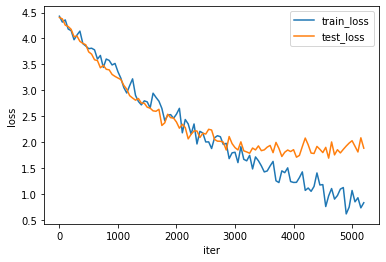

In [ ]:
epochs = 15
initial_lr = 0.05 # learning rate
# initial_lr = 0.5 # learning rate
lr_decay = 0.95
lr = initial_lr


net = MyVGG16Net(100).to(device) #ネットワークの生成 & GPU転送
# net = Net().to(device) #ネットワークの生成 & GPU転送


#損失関数と optimizer LRスケジューラの定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=initial_lr, momentum=0.9, weight_decay = 5e-4)
# optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=4e-3) # weight_decayを使用するoptimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=lr_decay, last_epoch=-1)

train_loss, test_loss = train(net, criterion, optimizer, scheduler, epochs)  # ネットワークを訓練する
show_loss(train_loss, test_loss) # 損失の変遷を表示する

In [ ]:
#ネットワークの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1) # 3*3conv 1padding = サイズ不変
        self.conv2 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv4 = nn.Conv2d(256, 16, 3, padding = 1)
        self.pool = nn.MaxPool2d(2) #2*2max pooling, stride=2 = サイズ 半分
        self.fc1 = nn.Linear(16 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


dataiter = iter(trainloader)  # ローダを使って実際にデータを取得するためのイテレータを作成する
images, labels = dataiter.next()  # イテレータからデータを取得する


net = Net().to(device) #ネットワークの生成 & GPU転送


# 画像を表示する
# imshow(torchvision.utils.make_grid(images))
# images = images.to(device)
# outputs = net(images)
# _, predicted = torch.max(outputs.data, 1)
# # ラベル(クラス)を表示する
# print(' '.join('%5s' % class_names[predicted[j]] for j in range(128)))
# print(outputs[0])
# print(outputs[120])
# print(images.requires_grad)

summary(net, (3,32,32))

# epochs = 5
# initial_lr = 0.05 # learning rate
# # initial_lr = 0.5 # learning rate
# lr_decay = 0.95
# lr = initial_lr


# #損失関数と optimizer LRスケジューラの定義
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay = 5e-4)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=lr_decay, last_epoch=-1)

# train_loss, test_loss = train(net, criterion, optimizer, scheduler, epochs)  # ネットワークを訓練する
# show_loss(train_loss, test_loss) # 損失の変遷を表示する

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
            Conv2d-2          [-1, 128, 32, 32]          73,856
         MaxPool2d-3          [-1, 128, 16, 16]               0
            Conv2d-4          [-1, 256, 16, 16]         295,168
            Conv2d-5           [-1, 16, 16, 16]          36,880
         MaxPool2d-6             [-1, 16, 8, 8]               0
            Linear-7                  [-1, 120]         123,000
            Linear-8                   [-1, 84]          10,164
            Linear-9                  [-1, 100]           8,500
Total params: 549,360
Trainable params: 549,360
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 2.29
Params size (MB): 2.10
Estimated Total Size (MB): 4.40
-------------------------------------------